IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING CALIFORNIA DATASET FROM SKLEARN

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

PERFORMING EDA

In [8]:
data_df = california_housing.data
target_df = california_housing.target

In [9]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
df = pd.concat([data_df, target_df.rename('Target')], axis=1)

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
df.shape


(20640, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [19]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [43]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [18]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


VISUALIZATION OF THE DATAFRAME

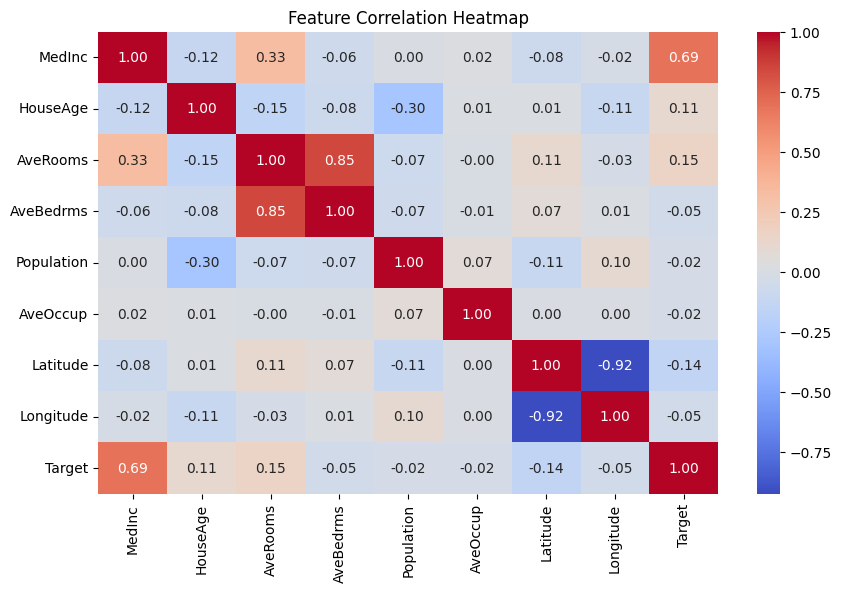

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



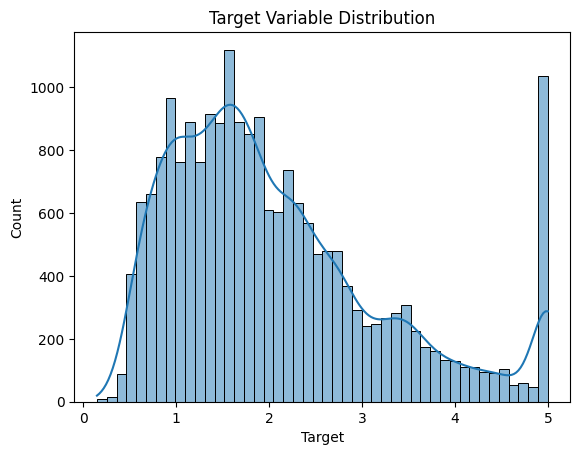

In [23]:
# Distribution of target variable
sns.histplot(df["Target"], kde=True)
plt.title("Target Variable Distribution")
plt.show()

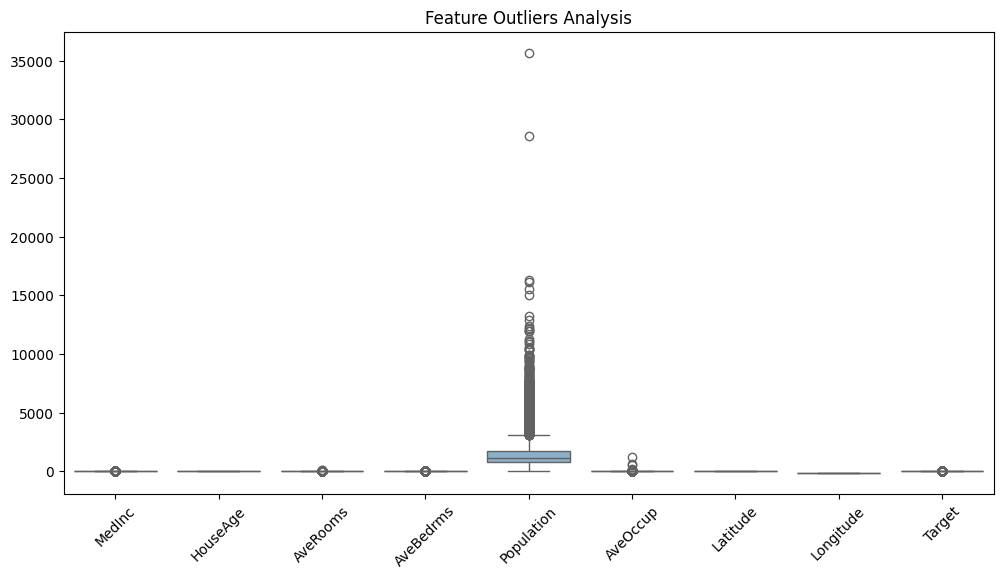

In [24]:
# Box plot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title("Feature Outliers Analysis")
plt.show()

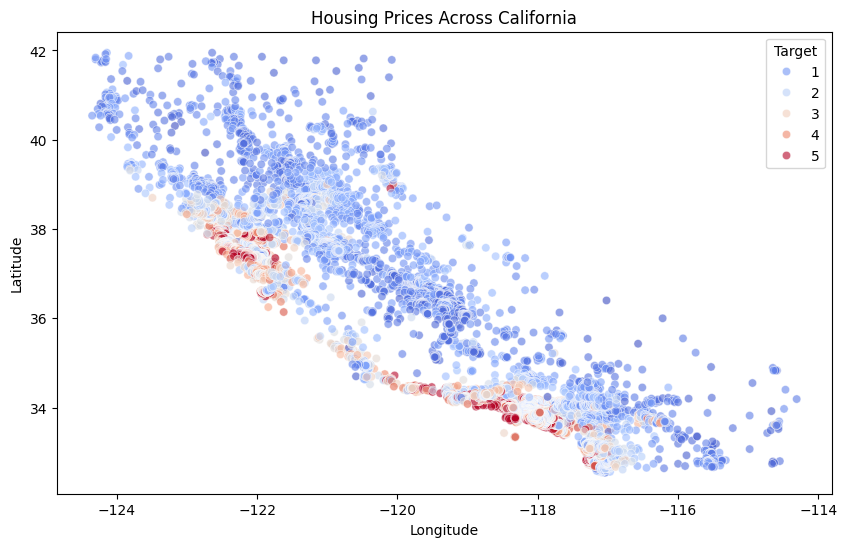

In [25]:
# Visualizing Latitude and Longitude as geographic data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue=df["Target"], palette='coolwarm', alpha=0.6)
plt.title("Housing Prices Across California")
plt.show()

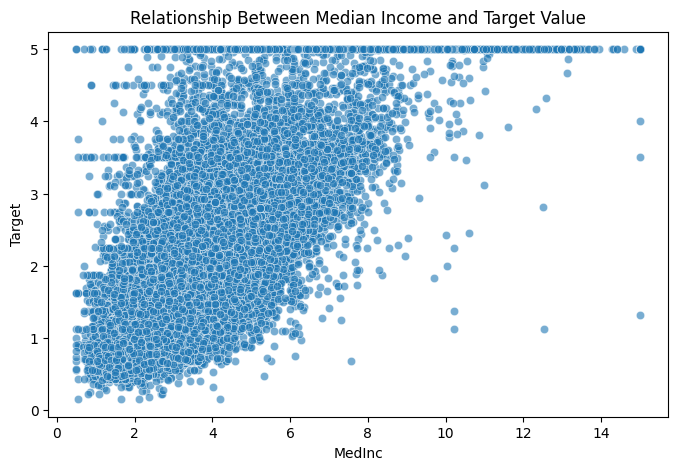

In [26]:
# Correlation between MedInc and House Value
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="MedInc", y="Target", alpha=0.6)
plt.title("Relationship Between Median Income and Target Value")
plt.show()

TRAINING THE MODEL ON DT REGRESSOR

In [48]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [49]:
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

EVALUATION METRICS

In [50]:
def custom_r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [51]:
def custom_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [52]:
y_pred = regressor.predict(X_test)

In [54]:
r2 = custom_r2_score(y_test, y_pred)
mae = custom_mae(y_test, y_pred)

In [55]:
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)

R-squared: 0.5997321244428706
Mean Absolute Error (MAE): 0.5222592972077786


VISUALIZATION OF DT

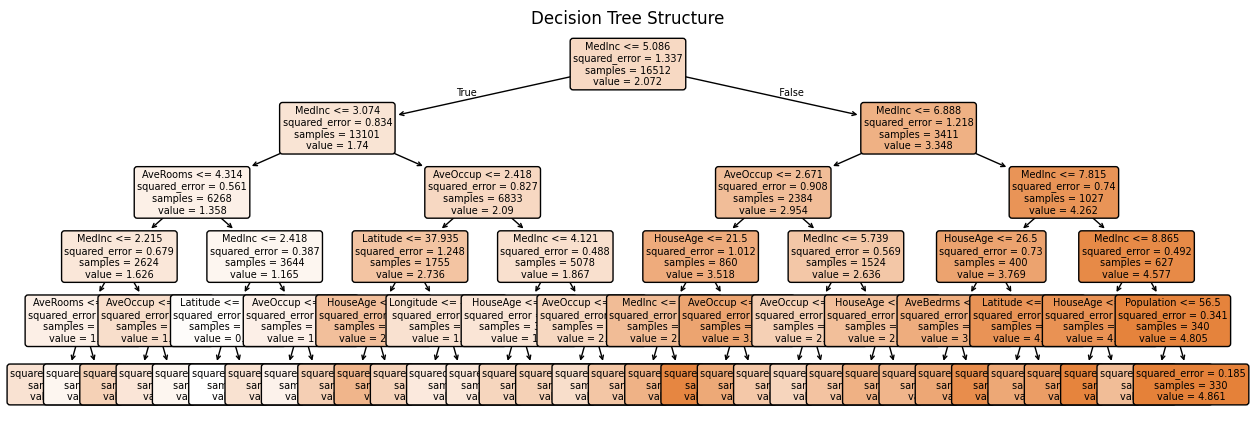

In [56]:
plt.figure(figsize=(15, 5))
plot_tree(
    regressor,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=7
)
plt.title("Decision Tree Structure")
plt.show()
